In [154]:
from Climate_analysis import *
from warnings import filterwarnings
from scipy import stats
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

## Load Calibration results


In [2]:
calibration_results = pd.read_csv('output_tc/paramsets_thundercreek_era5.csv', index_col=0)
parameters = calibration_results.iloc[0, -20:]

## Run Validation

In [3]:
# validation_results, simulations, evaporation = run_validation(calibration_results)
# validation_results.to_csv('output_tc/validation.csv')
# simulations.to_csv('Data/ThunderCreek/HBVmountain_simulations_ERA5_thundercreek.csv')
# evaporation.to_csv('Data/ThunderCreek/HBVmountain_evaporation_ERA5_thundercreek.csv')


era5_simulation = pd.read_csv('Data/ThunderCreek/HBVmountain_simulations_ERA5_thundercreek.csv', index_col=0)
era5_simulation.index = pd.to_datetime(era5_simulation.index)
era5_simulation = pd.DataFrame(era5_simulation.rolling(window=7).mean())

evaporation = pd.read_csv('Data/ThunderCreek/HBVmountain_evaporation_ERA5_thundercreek.csv', index_col=0, parse_dates=True)
evaporation.index = pd.to_datetime(evaporation.index)

In [4]:
calibration = pd.read_csv('output_tc/paramsets_thundercreek_era5.csv')
# calibration = calibration.loc[calibration['ED'].isin(calibration.ED.nsmallest(60))]
calibration.reset_index(inplace=True)

validation  = pd.read_csv('output_tc/validation_era5.csv').iloc[: , :6]
validation.rename(columns={"ED": "ED_val", "NSE": "NSE_val", "logNSE": "logNSE_val", "NSEfdc": "NSEfdc_val", "NSErunoff": "NSErunoff_val"}, inplace=True)

calval_paramsets =  pd.concat([calibration.iloc[: , :6], validation], axis=1)

# calval_paramsets = calval_paramsets.loc[calval_paramsets.ED_val <=0.4]

calval_results = calibration.loc[calibration.index.isin(calval_paramsets.loc[calval_paramsets.ED_val < 0.4].index)]
calval_results.to_csv('calval_results.csv')

calval_results = pd.read_csv('calval_results.csv', index_col=0)
era5_simulation = era5_simulation.iloc[:, calval_results.index.values]
evaporation = evaporation.iloc[:, calval_results.index.values]

In [5]:
# evaporation = evaporation.loc[evaporation.index.isin(calval_results.index)]
# era5_simulation = 
# calval_results.iloc[:,0].index
calval_results.index.values


array([ 1,  2,  3,  7,  9, 10, 13, 15, 19, 20, 22, 23, 25, 27, 29, 31, 33,
       40, 44, 48], dtype=int64)

### Run climate simulations

In [6]:
# dfhist = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp585.nc')

# dfhist.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_hist.csv')
# df245.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_ssp245.csv')
# df585.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_ssp585.csv')


# dfhist = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc')
# df245 = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp245.nc')
# df585 = run_climate_simulations(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp585.nc')

# dfhist.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_hist.csv')
# df245.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp245.csv')
# df585.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp585.csv')

In [7]:
# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_hist_bc.csv')
# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp245.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp585.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_GFDL-CM4_thundercreek_ssp585_bc.csv')




# dfhist_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc')
# dfhist_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_hist_bc.csv')

# df245_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp245.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc')
# df245_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp245_bc.csv')

# df585_bc = run_climate_simulations_biascorrected(calval_results, 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp585.nc',
#                                            'Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc', 'Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc')
# df585_bc.to_csv('Data/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp585_bc.csv')

### Load Forcing

In [33]:
ERA5_forcing = nc.Dataset('Data/ThunderCreek/HBVmountain_ERA5_ThunderCreek_1986_2005.nc')
ERA5_forcing = generate_forcing_from_NETCDF(ERA5_forcing)
ERA5_forcing.index = pd.to_datetime(ERA5_forcing.index)

hist_gfdl_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_1975_2005.nc')
hist_gfdl_forcing = generate_forcing_from_NETCDF(hist_gfdl_forcing)
hist_gfdl_forcing.index = pd.to_datetime(hist_gfdl_forcing.index)

ssp245_gfdl_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp245.nc')
ssp245_gfdl_forcing = generate_forcing_from_NETCDF(ssp245_gfdl_forcing)
ssp245_gfdl_forcing.index = pd.to_datetime(ssp245_gfdl_forcing.index)

ssp585_gfdl_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_GFDL-CM4_ThunderCreek_2067_2100_ssp245.nc')
ssp585_gfdl_forcing = generate_forcing_from_NETCDF(ssp585_gfdl_forcing)
ssp585_gfdl_forcing.index = pd.to_datetime(ssp585_gfdl_forcing.index)

hist_mpi_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_1975_2005.nc')
hist_mpi_forcing = generate_forcing_from_NETCDF(hist_mpi_forcing)
hist_mpi_forcing.index = pd.to_datetime(hist_mpi_forcing.index)

ssp245_mpi_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp245.nc')
ssp245_mpi_forcing = generate_forcing_from_NETCDF(ssp245_mpi_forcing)
ssp245_mpi_forcing.index = pd.to_datetime(ssp245_mpi_forcing.index)

ssp585_mpi_forcing =  nc.Dataset('Data/ThunderCreek/HBVmountain_MPI-ESM1-2-HR_ThunderCreek_2067_2100_ssp245.nc')
ssp585_mpi_forcing = generate_forcing_from_NETCDF(ssp585_mpi_forcing)
ssp585_mpi_forcing.index = pd.to_datetime(ssp585_mpi_forcing.index)

### Load GRDC observations

In [9]:
observation = pd.read_csv('Data/ThunderCreek/Discharge_ThunderCreek.csv', index_col=0) /(271.9 * 1e6) * 1000 *86400
observation.index = pd.to_datetime(observation.index)
observation = pd.DataFrame(observation['streamflow'].rolling(window=7).mean())

observation.head(10)


,streamflow
time,
1986-01-01,NaN
1986-01-02,NaN
1986-01-03,NaN
1986-01-04,NaN
1986-01-05,NaN
1986-01-06,NaN
1986-01-07,0.953791
1986-01-08,0.955062
1986-01-09,0.952520


### Load climate simulations


In [10]:
simulations_GFDL_CM4_historical = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_hist.csv', index_col=[0])
simulations_GFDL_CM4_historical.index = pd.to_datetime(simulations_GFDL_CM4_historical.index)
simulations_GFDL_CM4_historical = pd.DataFrame(simulations_GFDL_CM4_historical.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245 = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_ssp245.csv', index_col=[0])
simulations_GFDL_CM4_ssp245.index = pd.to_datetime(simulations_GFDL_CM4_ssp245.index)
simulations_GFDL_CM4_ssp245 = pd.DataFrame(simulations_GFDL_CM4_ssp245.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585 = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_ssp585.csv', index_col=[0])
simulations_GFDL_CM4_ssp585.index = pd.to_datetime(simulations_GFDL_CM4_ssp585.index)
simulations_GFDL_CM4_ssp585 = pd.DataFrame(simulations_GFDL_CM4_ssp585.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_hist.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical.index)
simulations_MPI_ESM1_2_HR_historical = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical.rolling(window=7).mean())


simulations_MPI_ESM1_2_HR_ssp245 = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp245.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245.index)
simulations_MPI_ESM1_2_HR_ssp245 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585 = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp585.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585.index)
simulations_MPI_ESM1_2_HR_ssp585 = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585.rolling(window=7).mean())

In [11]:
simulations_GFDL_CM4_historical_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_hist_bc.csv', index_col=[0])
simulations_GFDL_CM4_historical_bc.index = pd.to_datetime(simulations_GFDL_CM4_historical_bc.index)
simulations_GFDL_CM4_historical_bc = pd.DataFrame(simulations_GFDL_CM4_historical_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp245_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_ssp245_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp245_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp245_bc.index)
simulations_GFDL_CM4_ssp245_bc = pd.DataFrame(simulations_GFDL_CM4_ssp245_bc.rolling(window=7).mean())

simulations_GFDL_CM4_ssp585_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_GFDL-CM4_thundercreek_ssp585_bc.csv', index_col=[0])
simulations_GFDL_CM4_ssp585_bc.index = pd.to_datetime(simulations_GFDL_CM4_ssp585_bc.index)
simulations_GFDL_CM4_ssp585_bc = pd.DataFrame(simulations_GFDL_CM4_ssp585_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_historical_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_hist_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_historical_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_historical_bc.index)
simulations_MPI_ESM1_2_HR_historical_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_historical_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp245_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp245_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp245_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp245_bc.index)
simulations_MPI_ESM1_2_HR_ssp245_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp245_bc.rolling(window=7).mean())

simulations_MPI_ESM1_2_HR_ssp585_bc = pd.read_csv('Data/ThunderCreek/climate_simulations_MPI-ESM1-2-HR_thundercreek_ssp585_bc.csv', index_col=[0])
simulations_MPI_ESM1_2_HR_ssp585_bc.index = pd.to_datetime(simulations_MPI_ESM1_2_HR_ssp585_bc.index)
simulations_MPI_ESM1_2_HR_ssp585_bc = pd.DataFrame(simulations_MPI_ESM1_2_HR_ssp585_bc.rolling(window=7).mean())

## Cal/val results

In [12]:
calval_paramsets = calval_paramsets.loc[calval_paramsets.ED_val < 0.4]
calval_paramsets.mean() , calval_results.NSErunoff.mean()
1-calval_paramsets.ED.mean(), 1-calval_paramsets.ED_val.mean()

# calval_paramsets.logNSE.mean(), calval_paramsets.logNSE_val.mean()

(0.676721287884201, 0.6731392741476494)

# Analysis

In [13]:
daily_simulations_GFDL_CM4_historical_bc = simulations_GFDL_CM4_historical_bc.groupby(simulations_GFDL_CM4_historical_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_historical = simulations_GFDL_CM4_historical.groupby(simulations_GFDL_CM4_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical = simulations_MPI_ESM1_2_HR_historical.groupby(simulations_MPI_ESM1_2_HR_historical.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.groupby(simulations_MPI_ESM1_2_HR_historical_bc.index.strftime("%m-%d")).mean()


daily_observation = observation.groupby(observation.index.strftime("%m-%d")).mean()
daily_era5_simulation = era5_simulation.groupby(era5_simulation.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp245_bc = simulations_GFDL_CM4_ssp245_bc.groupby(simulations_GFDL_CM4_ssp245_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp245 = simulations_GFDL_CM4_ssp245.groupby(simulations_GFDL_CM4_ssp245.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp245 = simulations_MPI_ESM1_2_HR_ssp245.groupby(simulations_MPI_ESM1_2_HR_ssp245.index.strftime("%m-%d")).mean()

daily_simulations_GFDL_CM4_ssp585_bc = simulations_GFDL_CM4_ssp585_bc.groupby(simulations_GFDL_CM4_ssp585_bc.index.strftime("%m-%d")).mean()
daily_simulations_GFDL_CM4_ssp585 = simulations_GFDL_CM4_ssp585.groupby(simulations_GFDL_CM4_ssp585.index.strftime("%m-%d")).mean()
daily_simulations_MPI_ESM1_2_HR_ssp585 = simulations_MPI_ESM1_2_HR_ssp585.groupby(simulations_MPI_ESM1_2_HR_ssp585.index.strftime("%m-%d")).mean()


Text(0.5, 1.0, 'Thunder Creek')

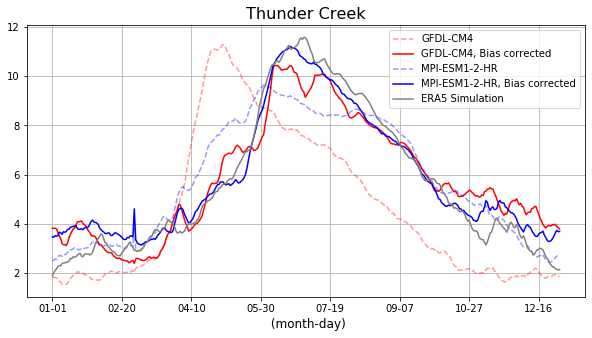

In [135]:
plt.rcParams["figure.figsize"] = (10, 5)

daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='r', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='r', label='GFDL-CM4, Bias corrected')

daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='b' , linestyle='--' , alpha=0.4, label='MPI-ESM1-2-HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='b', label='MPI-ESM1-2-HR, Bias corrected')
daily_era5_simulation.mean(axis=1).plot(color='grey', label='ERA5 Simulation')


# daily_observation.mean(axis=1).plot(color='k', label='Observation')
plt.legend()

# plt.plot(daily_simulations_GFDL_CM4_historical_bc)
plt.legend()
# plt.ylabel('mm day-1')
plt.xlabel(' (month-day)', fontsize=12)
daily_observation.index[0], daily_era5_simulation.index[0]
plt.grid()
plt.title('Thunder Creek', fontsize=16)

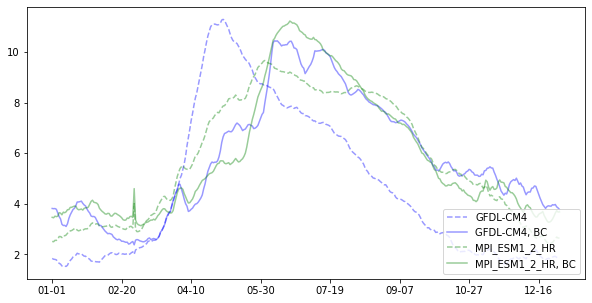

In [15]:
daily_simulations_GFDL_CM4_historical.mean(axis=1).plot(color='b', linestyle='--', alpha=0.4, label='GFDL-CM4')
daily_simulations_GFDL_CM4_historical_bc.mean(axis=1).plot(color='b', alpha=0.4, label='GFDL-CM4, BC')
daily_simulations_MPI_ESM1_2_HR_historical.mean(axis=1).plot(color='g', linestyle='--', alpha=0.4, label='MPI_ESM1_2_HR')
daily_simulations_MPI_ESM1_2_HR_historical_bc.mean(axis=1).plot(color='g', alpha=0.4, label='MPI_ESM1_2_HR, BC')



# daily_simulations_GFDL_CM4_ssp245_bc.mean(axis=1).plot(color='y',alpha=0.4, label='GFDL-CM4, ssp245, BC')
# daily_simulations_GFDL_CM4_ssp245.mean(axis=1).plot(color='y',linestyle='--',alpha=0.4, label='GFDL-CM4, ssp245')

# daily_simulations_GFDL_CM4_ssp585_bc.mean(axis=1).plot(color='r',alpha=0.4, label='GFDL-CM4, ssp585, BC')
# daily_simulations_GFDL_CM4_ssp585.mean(axis=1).plot(color='r',linestyle='--',alpha=0.4, label='GFDL-CM4, ssp585')
plt.legend(loc='lower right')

### Cum sum

In [16]:
cumsum_obs = observation.streamflow.groupby(observation.index.strftime("%y")).sum()
cumsum_prec = ERA5_forcing.loc[ERA5_forcing.index.year<=2005].prec.groupby(ERA5_forcing.loc[ERA5_forcing.index.year<=2005].index.strftime("%y")).sum()
cumsum_evap = evaporation.mean(axis=1).groupby(evaporation.index.strftime("%y")).sum()

tot = cumsum_prec -cumsum_evap - cumsum_obs
tot.to_csv('waterbalance_thundercreek.csv')

## Modelled streamflow 2000


Text(0.5, 0, '')

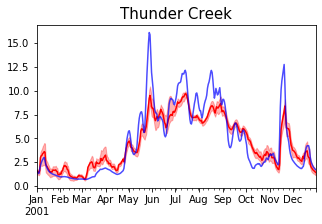

In [216]:
plt.figure(figsize=[5,3])
sim_2000 = era5_simulation.loc[era5_simulation.index.year == 2001]
obs_2000 = observation.loc[observation.index.year == 2001]

sim_2000.mean(axis=1).plot(color='r', label='ERA5 simulated')
obs_2000.mean(axis=1).plot(color='b', label='Observed', alpha=0.7)
plt.fill_between(sim_2000.index, sim_2000.min(axis=1), sim_2000.max(axis=1), color='r', alpha=0.3)
# plt.ylabel('mm day-1', fontsize=13)
plt.title('Thunder Creek', fontsize=15)
plt.xlabel('')
# plt.legend()

## Boxplots

In [226]:
def create_monthly_boxplots(simulations_hist, simulations_ssp245, simulations_ssp585):
    fig, axarr = plt.subplots(figsize=(7,4))

    hist = simulations_hist.groupby(simulations_hist.index.strftime("%y-%m")).sum()
    hist['mean'] = hist.mean(axis=1)
    hist['month'] = hist.index.str[3:]
    hist.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0-0.8, sym='', widths=0.6, color='k')

    ssp245 = simulations_ssp245.groupby(simulations_ssp245.index.strftime("%y-%m")).sum()
    ssp245['mean'] = ssp245.mean(axis=1)
    ssp245['month'] = ssp245.index.str[3:]
    ssp245.boxplot(by='month', column='mean', ax=axarr, sym='', positions=np.array(range(12))*3.0, widths=0.6, color='b')

    ssp585 = simulations_ssp585.groupby(simulations_ssp585.index.strftime("%y-%m")).sum()
    ssp585['mean'] = ssp585.mean(axis=1)
    ssp585['month'] = ssp585.index.str[3:]
    ssp585.boxplot(by='month', column='mean', ax=axarr, positions=np.array(range(12))*3.0+0.8, sym='', widths=0.6, color='r')
    
    ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    fig.suptitle('')
    plt.xticks(range(0, 12 * 3, 3), ticks)

Text(0.5, 0, '')

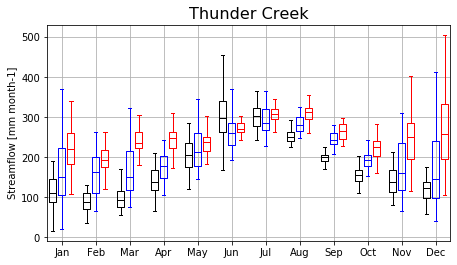

In [233]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

create_monthly_boxplots(hist, ssp245,
                        ssp585)
plt.title('Thunder Creek', fontsize=16)
plt.plot([], 'k', label='Historical')
plt.plot([], 'b', label='SSP245')
plt.plot([], 'r', label='SSP585')
plt.ylabel('Streamflow [mm month-1]')
# plt.xticks([])
plt.xlabel('')
# plt.legend()

In [63]:
def relative_change_monthly(reference, future):
    months = np.arange(1,13)
    index = np.arange(1,13)
    change = []

    for i in range(len(months)):
        hist = reference.loc[reference.index.month == months[i]].mean(axis=1).sum()
        projection = future.loc[future.index.month == months[i]].mean(axis=1).sum()
        rel_change = (projection-hist) / hist * 100
        change.append([index[i],rel_change])
    return change 


In [205]:
simulations_MPI_ESM1_2_HR_historical_bc = simulations_MPI_ESM1_2_HR_historical_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp245_bc = simulations_MPI_ESM1_2_HR_ssp245_bc.add_suffix('_MPI_ESM1_2_HR')
simulations_MPI_ESM1_2_HR_ssp585_bc = simulations_MPI_ESM1_2_HR_ssp585_bc.add_suffix('_MPI_ESM1_2_HR')

hist = pd.concat([simulations_GFDL_CM4_historical_bc, simulations_MPI_ESM1_2_HR_historical_bc], axis=1)
ssp245 = pd.concat([simulations_MPI_ESM1_2_HR_ssp245_bc, simulations_MPI_ESM1_2_HR_ssp245_bc], axis=1)
ssp585 = pd.concat([simulations_GFDL_CM4_ssp585_bc, simulations_MPI_ESM1_2_HR_ssp585_bc], axis=1)

hist_prec = pd.concat([hist_gfdl_forcing.prec, hist_mpi_forcing.prec], axis=1)
ssp245_prec = pd.concat([ssp245_gfdl_forcing.prec, ssp245_mpi_forcing.prec], axis=1)
ssp585_prec = pd.concat([ssp585_gfdl_forcing.prec, ssp585_mpi_forcing.prec], axis=1)

hist_temp = pd.concat([hist_gfdl_forcing.temp, hist_mpi_forcing.temp], axis=1)
ssp245_temp = pd.concat([ssp245_gfdl_forcing.temp, ssp245_mpi_forcing.temp], axis=1)
ssp585_temp = pd.concat([ssp585_gfdl_forcing.temp, ssp585_mpi_forcing.temp], axis=1)

relative_change_streamflow_ssp245 = relative_change_monthly(hist, ssp245)
relative_change_streamflow_ssp585 = relative_change_monthly(hist, ssp585)

relative_change_prec_ssp245 = relative_change_monthly(hist_prec, ssp245_prec)
relative_change_prec_ssp585 = relative_change_monthly(hist_prec, ssp585_prec)

relative_change_temp_ssp245 = relative_change_monthly(hist_temp, ssp245_temp)
relative_change_temp_ssp585 = relative_change_monthly(hist_temp, ssp585_temp)

# relative_change_streamflow = relative_change_monthly(hist, ssp585)

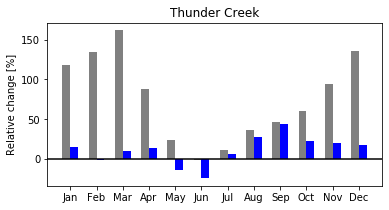

In [206]:
plt.figure(figsize=[6,3])

x1,y1 = zip(*relative_change_streamflow_ssp585)
x2,y2 = zip(*relative_change_prec_ssp585)
# x3,y3 = zip(*relative_change_temp_ssp585)

plt.bar(np.array(x1)-0.15, y1, width = 0.3, label='Streamflow', color='grey')
plt.bar(np.array(x2)+0.15, y2, width = 0.3, label='Precipitation', color='blue')
# plt.bar(np.array(x3)+0.2, y3, width = 0.2, label='Temperature', color='r')
#setting the xticks. Note x1 and x2 are tuples, thus + is concatenation
plt.xticks(range(min(x1+x2), max(x1+x2)+1)) 
# plt.grid()
plt.axhline(0, color='k')
plt.title('Thunder Creek')
# plt.ylim((-50,120))
plt.ylabel('Relative change [%]')
# plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Autumn'])
# plt.legend()
# plt.ylim((-70,260))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), ticks)

plt.show()

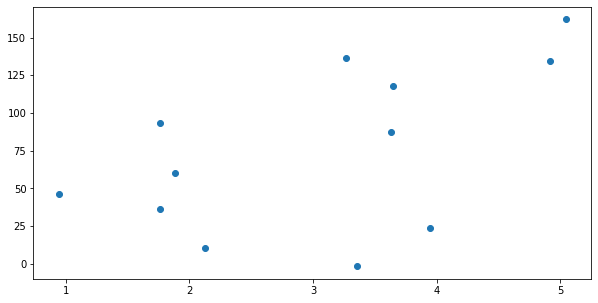

In [207]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)

plt.plot(change,y, 'o')

In [208]:
months = np.arange(1,13)
index = np.arange(1,13)
change = []

for i in range(len(months)):
    ref = hist_temp.loc[hist_temp.index.month == months[i]].mean(axis=1).mean()
    projection = ssp585_temp.loc[ssp585_temp.index.month == months[i]].mean(axis=1).mean()
    change.append(projection-ref)

x, y = zip(*relative_change_streamflow_ssp585)
x, dprec = zip(*relative_change_prec_ssp585)

output = pd.DataFrame({'streamflow_change': y, 'dprec': dprec, 'dT': change})

output.to_csv('streamflow_vs_temp_thundercreek.csv')
# plt.plot(change,y, 'o')
output

,streamflow_change,dprec,dT
0,117.662440,15.199833,3.651140
1,134.394808,-1.892591,4.918681
2,162.025189,9.373242,5.046349
3,87.727250,13.962657,3.627213
4,23.577642,-13.717136,3.948158
5,-1.675397,-24.634736,3.355069
6,10.873571,6.173008,2.125182
7,36.194531,27.717546,1.760382
8,46.267543,44.215142,0.943278
9,60.559356,22.967060,1.887536


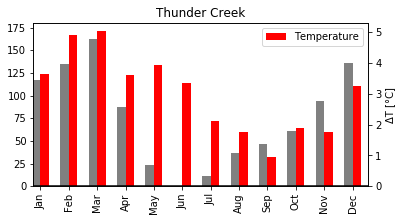

In [209]:
fig = plt.figure(figsize=[6,3]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

output.streamflow_change.plot(kind='bar', color='grey', ax=ax, width=width, position=1)
# plt.axhline(0)
output.dT.plot(kind='bar', color='r', ax=ax2, width=width, position=0,  label='Temperature')

# ax.set_ylabel('Relative change in streamflow [%]')
ax2.set_ylabel('ΔT [°C]')# plt.grid()
# plt.plot(y=0)
# ax2.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
ax.set_ylim((0, 180))
ticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(0, 12), ticks)
plt.axhline(0, color='k')
plt.legend()
plt.title('Thunder Creek')
plt.show()

## FDC

Text(0.5, 1.0, 'Thunder Creek')

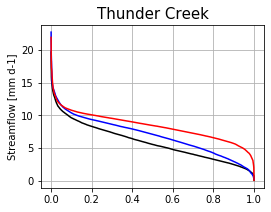

In [211]:
plt.figure(figsize=[4,3])
SortedQ_hist, ExcProb_hist = flowdurationcurve(hist.mean(axis=1).values)
SortedQ_ssp245, ExcProb_ssp245 = flowdurationcurve(ssp245.mean(axis=1).values)
SortedQ_ssp585, ExcProb_ssp585 = flowdurationcurve(ssp585.mean(axis=1).values)

plt.plot(ExcProb_hist, SortedQ_hist, color='k', label='Historical')
plt.plot(ExcProb_ssp245, SortedQ_ssp245, color='b', label='SSP245')
plt.plot(ExcProb_ssp585, SortedQ_ssp585, color='r', label='SSP585')


# plt.xscale('log')
plt.grid()
# plt.legend()
plt.ylabel('Streamflow [mm d-1]')
# plt.xlabel('Exceedance probability [-]')
plt.title('Thunder Creek', fontsize=15)

## Relative change seasonal prec + temp

In [224]:
prec_hist_bothmodels = (hist_gfdl_forcing.prec.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.prec.groupby(hist_mpi_forcing.index.month).mean()) / 2
prec_ssp245_bothmodels = (ssp245_gfdl_forcing.prec.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.prec.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
prec_ssp585_bothmodels = (ssp585_gfdl_forcing.prec.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.prec.groupby(ssp585_mpi_forcing.index.month).mean()) / 2


rel_dif_prec = (prec_ssp245_bothmodels - prec_hist_bothmodels) / prec_hist_bothmodels


temp_hist_bothmodels = (hist_gfdl_forcing.temp.groupby(hist_gfdl_forcing.index.month).mean() +hist_mpi_forcing.temp.groupby(hist_mpi_forcing.index.month).mean()) / 2
temp_ssp245_bothmodels = (ssp245_gfdl_forcing.temp.groupby(ssp245_gfdl_forcing.index.month).mean() +ssp245_mpi_forcing.temp.groupby(ssp245_mpi_forcing.index.month).mean()) / 2
temp_ssp585_bothmodels = (ssp585_gfdl_forcing.temp.groupby(ssp585_gfdl_forcing.index.month).mean() +ssp585_mpi_forcing.temp.groupby(ssp585_mpi_forcing.index.month).mean()) / 2

abs_dif_temp = (temp_ssp245_bothmodels - temp_hist_bothmodels) 


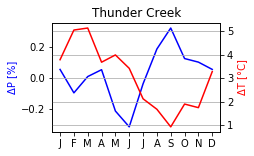

In [232]:
fig = plt.figure(figsize=[3,2]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

plt.plot(rel_dif_prec, color='b')

ax2=ax.twinx()
ax2.plot(abs_dif_temp,color="r")
ax2.set_ylabel("ΔT [°C]",color="r")
ax.set_ylabel('ΔP [%]', color='b')
ticks = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
plt.xticks(range(1, 13), ticks)
plt.grid()
plt.title('Thunder Creek', fontsize=12)
plt.show()

## Changes in extremes

In [160]:
hist_14day = hist.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
ssp245_14day = ssp245.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()
ssp585_14day = ssp585.mean(axis=1).groupby(pd.Grouper(freq='7D')).mean()

Text(0.5, 1.0, 'Thunder Creek')

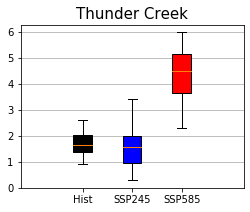

In [219]:
min_hist_14day = hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].groupby(hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].index.strftime("%y")).min()
min_ssp245_14day = ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].groupby(ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].index.strftime("%y")).min()
min_ssp585_14day = ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].groupby(ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].index.strftime("%y")).min()


plt.figure(figsize=[4,3])

bplot1 = plt.boxplot(min_hist_14day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(min_ssp245_14day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(min_ssp585_14day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

colors = ['black', 'blue', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.title('Thunder Creek', fontsize=15)
# plt.ylabel('min streamflow [mm day-1]')

In [218]:
(min_ssp245_14day.median() - min_hist_14day.median()) / min_hist_14day.median() * 100

176.3726813881161

Text(0.5, 1.0, 'Thunder Creek')

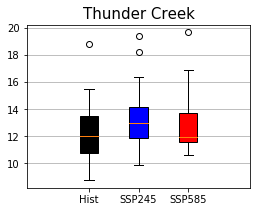

In [220]:
# max_hist_14day = hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].groupby(hist_14day.loc[hist_14day.index.year> hist_14day.index[0].year].index.strftime("%y")).max()
max_ssp245_14day = ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].groupby(ssp245_14day.loc[ssp245_14day.index.year> ssp245_14day.index[0].year].index.strftime("%y")).max()
max_ssp585_14day = ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].groupby(ssp585_14day.loc[ssp585_14day.index.year> ssp585_14day.index[0].year].index.strftime("%y")).max()


plt.figure(figsize=[4,3])

bplot1 = plt.boxplot(max_hist_14day, patch_artist=True,  positions=np.array(range(1))*3.0-0.4)
bplot2 = plt.boxplot(max_ssp245_14day, patch_artist=True,  positions=np.array(range(1))*3.0)
bplot3 = plt.boxplot(max_ssp585_14day, patch_artist=True, positions=np.array(range(1))*3.0+0.4)

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor('black') 
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor('blue') 
for patch, color in zip(bplot3['boxes'], colors):
    patch.set_facecolor('red') 
    
ticks = ['Hist', 'SSP245', 'SSP585']
plt.xticks([-0.4, 0, 0.4], ticks)
plt.grid(axis='y')
plt.title('Thunder Creek', fontsize=15)
# plt.ylabel('max streamflow [mm day-1]')

In [221]:
(max_ssp245_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100, (max_ssp585_14day.median() - max_hist_14day.median()) / max_hist_14day.median() * 100

(7.808070753933127, -0.8614623482904389)

### Timing

In [163]:
hist_yearly_max = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmax().values)
hist_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_max])
hist_max_doy_stat = [stats.circmean(hist_yearly_max_doy, high=365), stats.circstd(hist_yearly_max_doy, high=365)]

ssp245_yearly_max = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp245_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_max])
ssp245_max_doy_stat = [stats.circmean(ssp245_yearly_max_doy, high=365), stats.circstd(ssp245_yearly_max_doy, high=365)]

ssp585_yearly_max = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmax().values)
ssp585_yearly_max_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_max])
ssp585_max_doy_stat = [stats.circmean(ssp585_yearly_max_doy, high=365), stats.circstd(ssp585_yearly_max_doy, high=365)]
print(hist_max_doy_stat, ssp245_max_doy_stat, ssp585_max_doy_stat)

[167.98342373614705, 13.905831959957236] [48.6569200805044, 115.42351963548391] [358.255193287497, 79.6806813913155]


In [164]:
hist_yearly_min = pd.to_datetime(pd.DataFrame(hist_14day.loc[(hist_14day.index.year>hist_14day.index[0].year)]).resample('1y')[0].idxmin().values)
hist_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in hist_yearly_min])
hist_min_doy_stat = [stats.circmean(hist_yearly_min_doy, high=365), stats.circstd(hist_yearly_min_doy, high=365)]

ssp245_yearly_min = pd.to_datetime(pd.DataFrame(ssp245_14day.loc[(ssp245_14day.index.year>ssp245_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp245_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp245_yearly_min])
ssp245_min_doy_stat = [stats.circmean(ssp245_yearly_min_doy, high=365), stats.circstd(ssp245_yearly_min_doy, high=365)]

ssp585_yearly_min = pd.to_datetime(pd.DataFrame(ssp585_14day.loc[(ssp585_14day.index.year>ssp585_14day.index[0].year)]).resample('1y')[0].idxmin().values)
ssp585_yearly_min_doy = np.array([dt.timetuple().tm_yday for dt in ssp585_yearly_min])
ssp585_min_doy_stat = [stats.circmean(ssp585_yearly_min_doy, high=365), stats.circstd(ssp585_yearly_min_doy, high=365)]
print(hist_min_doy_stat, ssp245_min_doy_stat, ssp585_min_doy_stat)

[33.49331706829654, 34.028773834615855] [5.9288045435234675, 32.8343781010333] [5.5234438108288355, 45.11894899029191]


In [192]:
reference = stats.circmean(hist_yearly_min_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_min_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_min_doy, high=365) - reference

delta_ssp245, delta_ssp585

(-27.564512524773072, -27.969873257467704)

In [193]:
reference = stats.circmean(hist_yearly_max_doy, high=365)
delta_ssp245 = stats.circmean(ssp245_yearly_max_doy, high=365) - reference
delta_ssp585 = stats.circmean(ssp585_yearly_max_doy, high=365)- reference

delta_ssp245, delta_ssp585

(-119.32650365564265, 190.27176955134993)

In [198]:
def distance(len_my_list, idx_1, idx_2):
    i = (idx_1 - idx_2) % len_my_list
    j = (idx_2 - idx_1) % len_my_list
    return min(i, j)
distance(365, reference, stats.circmean(ssp245_yearly_max_doy, high=365)), distance(365, reference, stats.circmean(ssp585_yearly_max_doy, high=365))

(119.32650365564265, 174.72823044865007)